# Telco Customer Churn
### Part-1: Data Exploration

##### Data Dictionary

-   **CustomerID:** A unique ID that identifies each customer.
-   **Gender:** The customer’s gender: Male, Female
-   **Age:** The customer’s current age, in years, at the time the fiscal quarter ended.
-   **Senior Citizen:** Indicates if the customer is 65 or older: Yes, No
-   **Married (Partner):** Indicates if the customer is married: Yes, No
-   **Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
-   **Number of Dependents:** Indicates the number of dependents that live with the customer.
-   **Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No
-   **Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
-   **Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
-   **Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
-   **Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
-   **Device Protection Plan:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
-   **Premium Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
-   **Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
-   **Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
-   **Contract:** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
-   **Paperless Billing:** Indicates if the customer has chosen paperless billing: Yes, No
-   **Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
-   **Monthly Charge:** Indicates the customer’s current total monthly charge for all their services from the company.
-   **Total Charges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.
-   **Tenure:** Indicates the total amount of months that the customer has been with the company.
-   **Churn:** Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

#### Imports 

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [354]:
from scipy.stats import chi2_contingency

#### Loading Data

In [355]:
df = pd.read_csv(r"data\Telco_customer_churn.csv")

In [356]:
df.head(5).T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


Numerical Features -> 
 -    tenure : No. of Months the customer has stayed
 -   MonthlyCharges : Monthly charged amount 
 -   TotalCharges : Total charges to the customer


#### Overview and Cleaning

In [357]:
df.shape

(7043, 21)

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [359]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Issues Spotted 
1. TotalCharges - wrong datatype (is an object -> should be float)
2. SeniorCitizen - wrong datatype (is numerical -> should be boolean)
3. customerID - redundant


##### Dealing with: **TotalCharges**

In [360]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [361]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [362]:
df[df['TotalCharges'].isnull()].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
customerID,4472-LVYGI,3115-CZMZD,5709-LVOEQ,4367-NUYAO,1371-DWPAZ,7644-OMVMY,3213-VVOLG,2520-SGTTA,2923-ARZLG,4075-WKNIU,2775-SEFEE
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes


In [363]:
df[df['TotalCharges'].isnull()].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,11.0,0.000000,0.000000,0.0,0.000,0.00,0.000,0.00
tenure,11.0,0.000000,0.000000,0.0,0.000,0.00,0.000,0.00
MonthlyCharges,11.0,41.418182,23.831484,19.7,20.125,25.75,58.975,80.85
TotalCharges,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [364]:
zero_tenure = df[df['tenure'] == 0].index
na_total_charges = df[df['TotalCharges'].isnull()].index

zero_tenure.equals(na_total_charges)

True

In [365]:
df = df.drop(index=zero_tenure)

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

Points to note -
- All values for tenure are 0
- TotalCharges are NaN
<br>
<p>
1. As verified, the rows missing the TotalCharges are the same as the ones where tenure is 0. <br>
2. This could be caused by TotalCharges updating once a month, and since a month hasn't passed, the values didn't get updated.<br>
3. But, since only 11 of such entries exist, it is safer to drop them, than risk to pollute the data with incorrect assumptions.
</p>

##### Dealing with: **SeniorCitizen**

In [367]:
df['SeniorCitizen'] = (df['SeniorCitizen']).astype(bool)

In [368]:
df['SeniorCitizen'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: SeniorCitizen
Non-Null Count  Dtype
--------------  -----
7032 non-null   bool 
dtypes: bool(1)
memory usage: 61.8 KB


##### Dealing with: **customerID**

In [369]:
df = df.drop(columns=['customerID'])

In [370]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,False,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,False,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,False,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,False,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,False,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Descriptive Statistics (overall)

In [371]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


- Nothing particularly suspicious

#### Univariate Analysis

##### Categorical Variables

In [372]:
# Categorical feature distribution
categorical_features = df.select_dtypes(include=['object', 'bool']).columns
print(categorical_features)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


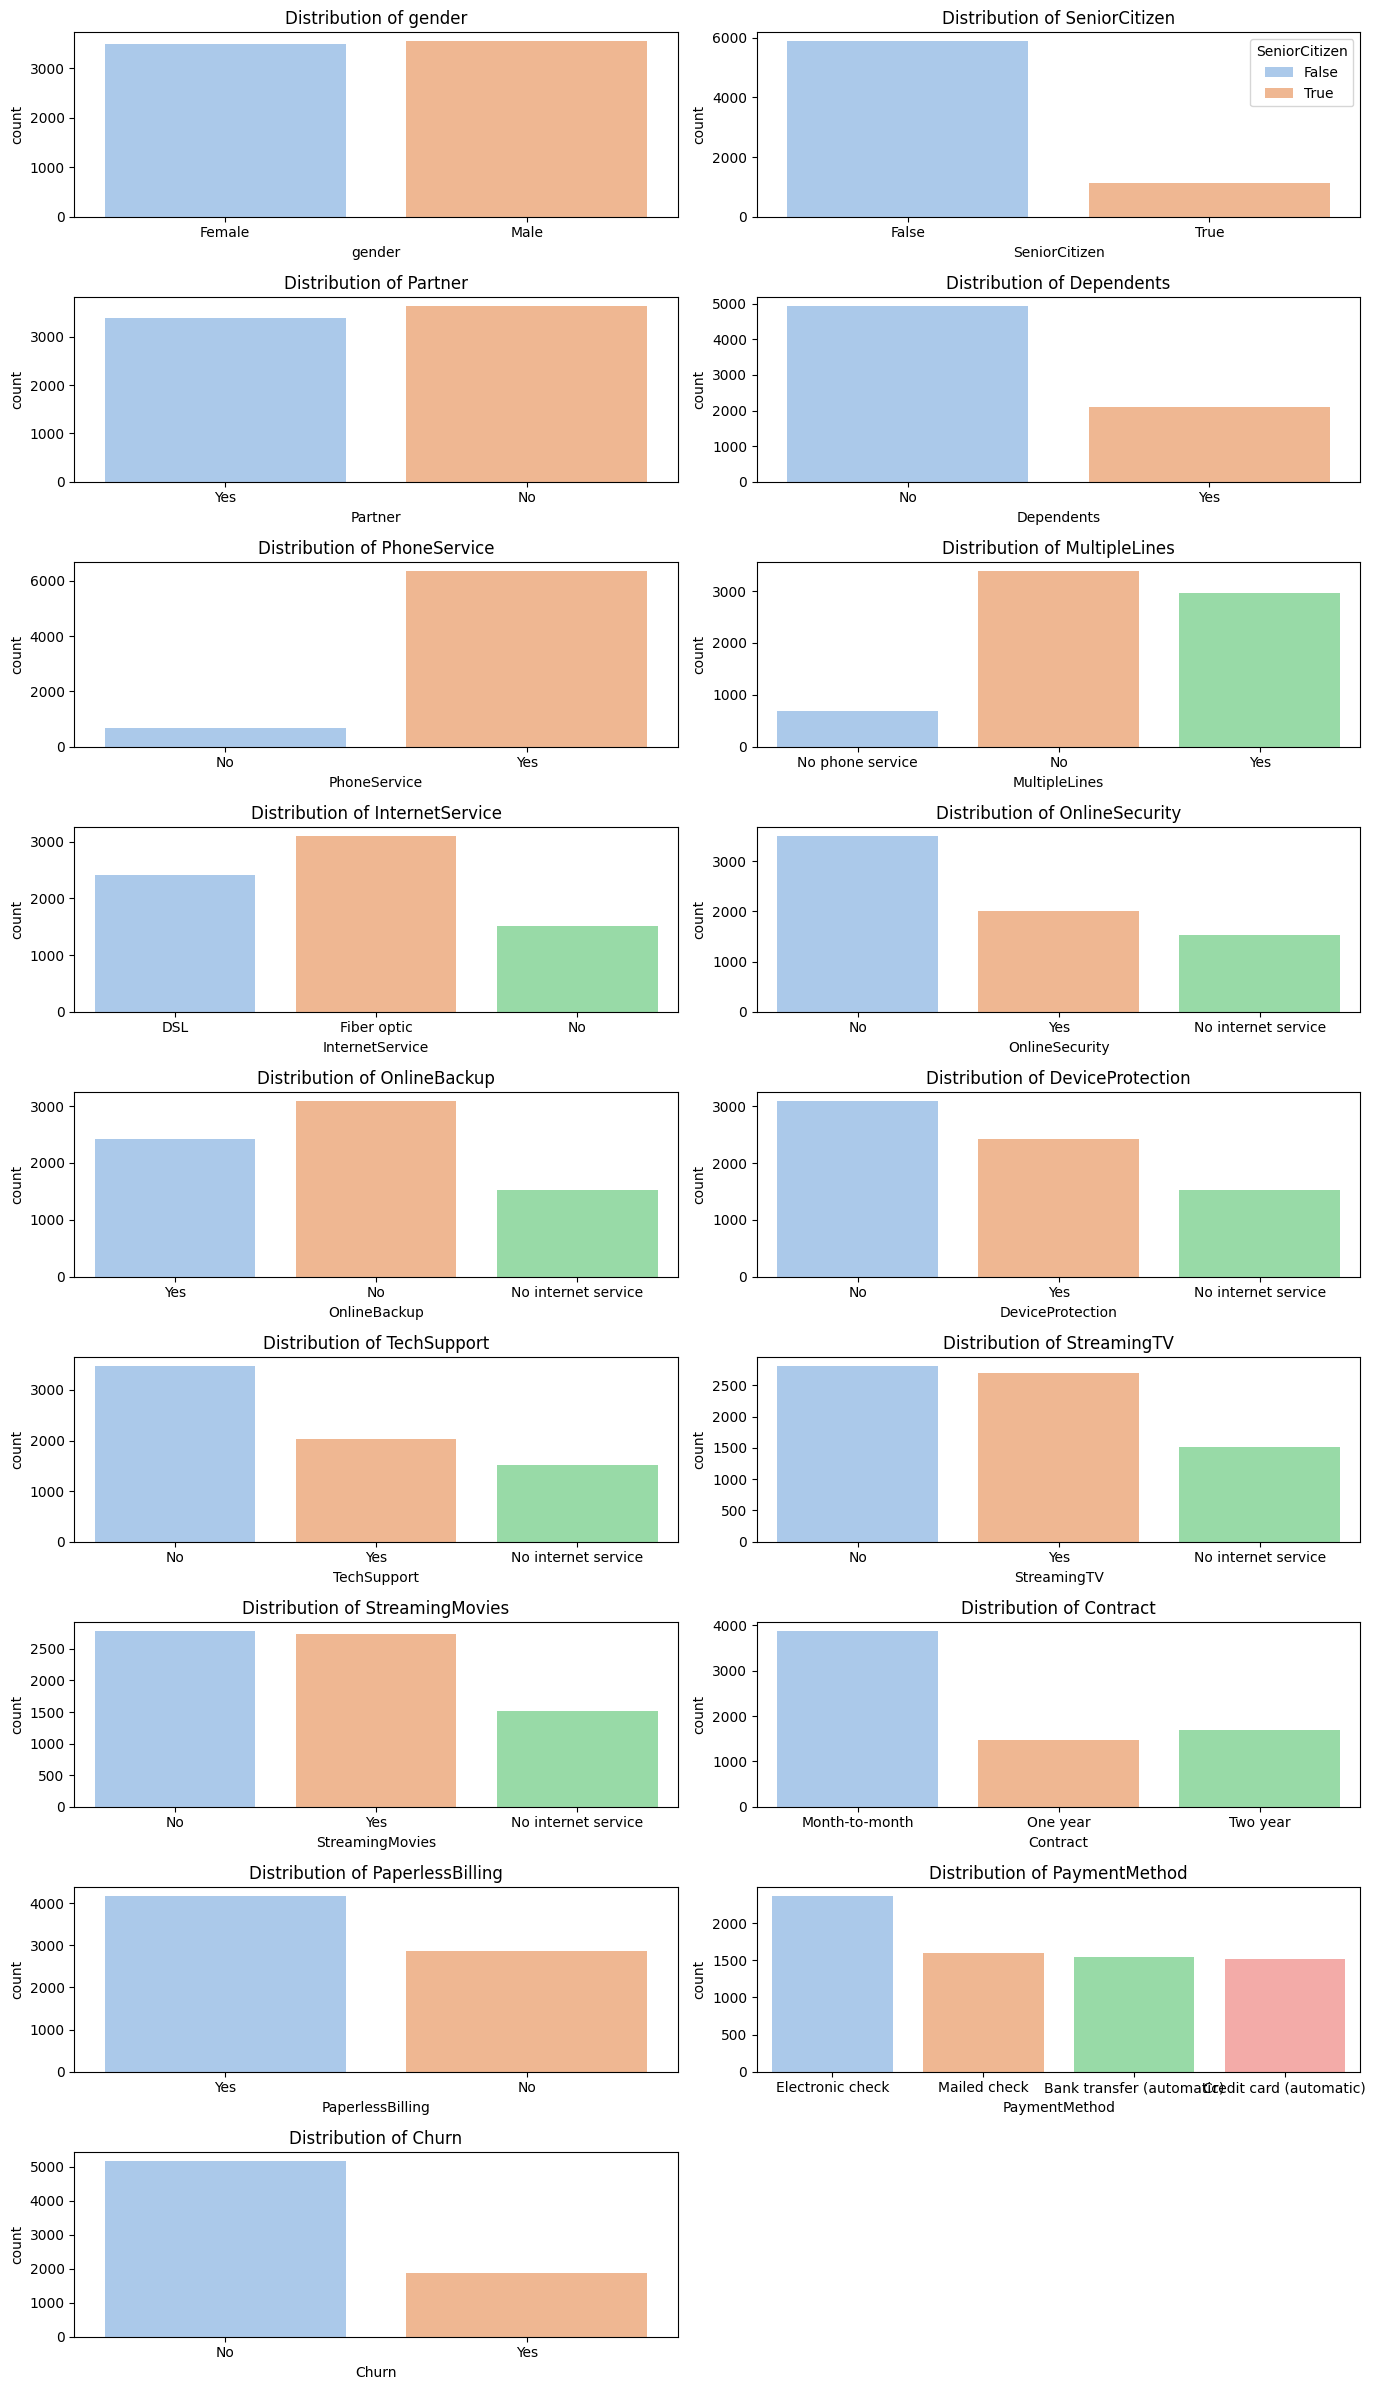

In [373]:
plt.figure(figsize=(14, 24))
rows = (len(categorical_features) // 2) + 1
cols = 2 # 2 per column

for i, col in enumerate(categorical_features, start=1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col, hue=col, palette='pastel')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


**Severe Class Imbalances:** <br>
*(As can be observed visually)*
- Churn
- MultipleLines
- Senior Citizens
- PhoneService
- Contracts
- Dependents

In [374]:
def analyze_categorical_imbalance(df, categorical_features, imbalance_threshold=2.0) -> list:
    """
    Analyze class imbalance and only show those with imbalance exceeding the threshold.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        categorical_features (list): A list of categorical column names.
        imbalance_threshold (float): The minimum ratio for a column to be considered imbalanced.
    """
    total = len(df)
    lst_set = []  # Changed to a list to maintain order

    for col in categorical_features:
        class_counts = df[col].value_counts()

        if len(class_counts) > 1:  # Only calculate ratio if there is more than one class.
            majority_class_count = class_counts.max()
            minority_class_count = class_counts.min()
            ratio = majority_class_count / minority_class_count

            if ratio > imbalance_threshold:
                print(f"Column: {col} (Imbalance Ratio: {ratio:.2f})")
                for class_label, count in class_counts.items():
                    percentage = count / total * 100
                    print(f"  Class '{class_label}': {count} samples ({percentage:.2f}%)")
                print("-" * 20)
                lst_set.append(col) #changed to append to preserve order
        else:
            print(f"Column: {col} only has one unique value, skipping")

    return lst_set

In [375]:
unbalanced_features = analyze_categorical_imbalance(df, categorical_features, 2.5)

Column: SeniorCitizen (Imbalance Ratio: 5.16)
  Class 'False': 5890 samples (83.76%)
  Class 'True': 1142 samples (16.24%)
--------------------
Column: PhoneService (Imbalance Ratio: 9.34)
  Class 'Yes': 6352 samples (90.33%)
  Class 'No': 680 samples (9.67%)
--------------------
Column: MultipleLines (Imbalance Ratio: 4.98)
  Class 'No': 3385 samples (48.14%)
  Class 'Yes': 2967 samples (42.19%)
  Class 'No phone service': 680 samples (9.67%)
--------------------
Column: Contract (Imbalance Ratio: 2.63)
  Class 'Month-to-month': 3875 samples (55.11%)
  Class 'Two year': 1685 samples (23.96%)
  Class 'One year': 1472 samples (20.93%)
--------------------
Column: Churn (Imbalance Ratio: 2.76)
  Class 'No': 5163 samples (73.42%)
  Class 'Yes': 1869 samples (26.58%)
--------------------


In [376]:
print(unbalanced_features)

['SeniorCitizen', 'PhoneService', 'MultipleLines', 'Contract', 'Churn']


##### Numerical Variables

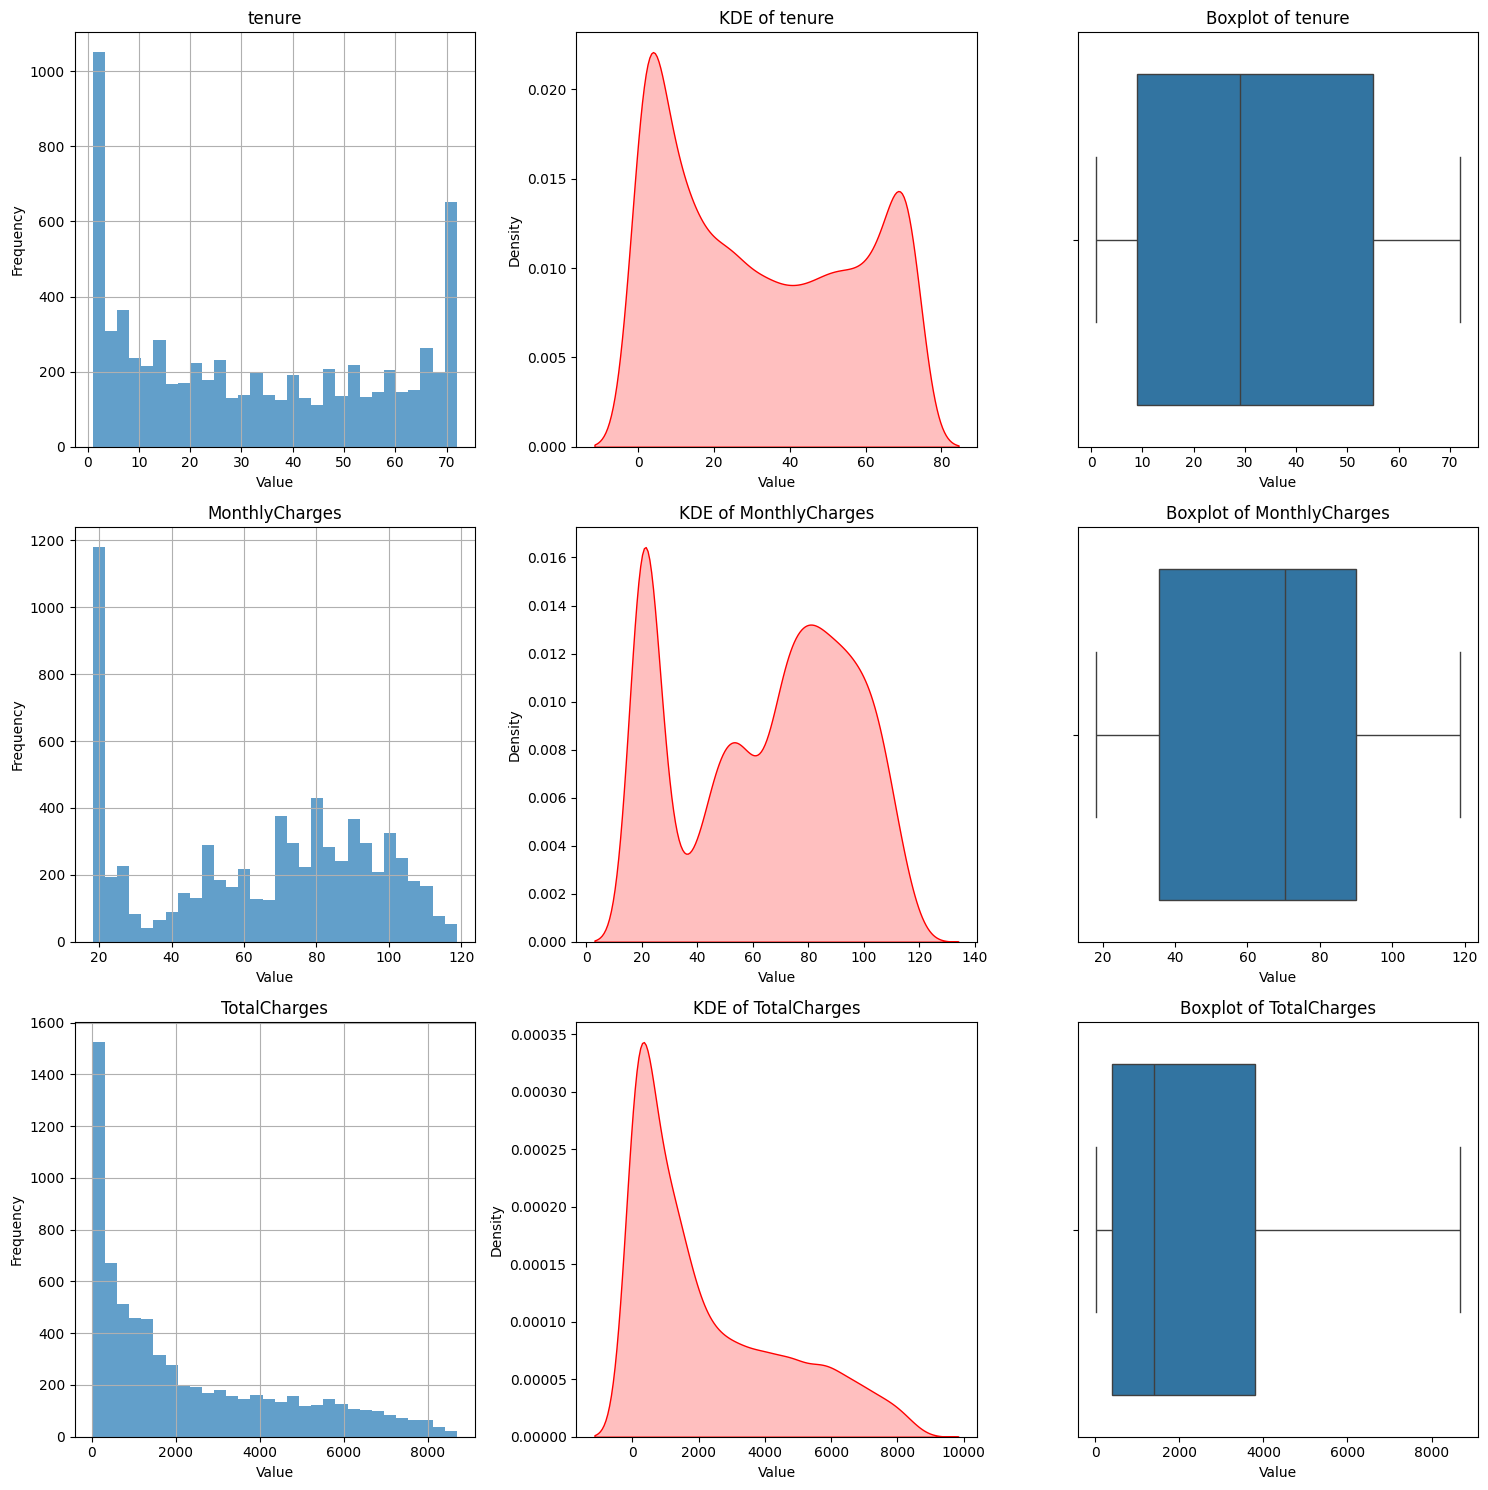

In [377]:
numerical_features = df.select_dtypes(include=['number']).columns

num_features = len(numerical_features)
rows = num_features
cols = 3

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numerical_features):
    # Histogram Subplot
    plt.subplot(rows, cols, i * cols + 1)
    df[col].hist(bins=30, alpha=0.7)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # KDE Subplot
    plt.subplot(rows, cols, i * cols + 2)
    sns.kdeplot(df[col], color='red', fill=True)
    plt.title(f'KDE of {col}')
    plt.xlabel('Value')
    plt.ylabel('Density')

    # Boxplot Subplot
    plt.subplot(rows, cols, i * cols + 3)
    sns.boxplot(x=df[col]) 
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

In [378]:
for col in numerical_features:
    skew = df[col].skew()
    print(f"{col}: {skew}")

tenure: 0.23773083190513133
MonthlyCharges: -0.22210292770166232
TotalCharges: 0.9616424997242504


**Tenure**
 1. left skewed
 2. bimodal
 3. no outliers
 4. spread between the two modes, ie concentrated volatility
 5. non-normal
- 25% of the customers seem to be new (less than 10 months) and 25% of the customers are old (in terms of being with the company) - (55-70 months). 

**MonthlyCharges**
 1. right skewed
 2. bimodal (maybe 3)
 3. no outliers
 4. inconclusive
 5. non-normal
- Study the grouping around the lower side of monthlyCharges

**Total Charges**
 1. Very Left skewed
 2. 1 mode
 3. no outliers
 4. spread towards the left tail, median also left of centre of the distribution
 5. non-normal
- Most customers have low total charges, implying they dont shop that often?

#### Bivariate Analysis

In [379]:
target_feature = 'Churn'
categorical_features = categorical_features.drop('Churn')
print(categorical_features, numerical_features, target_feature, sep='\n')

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Churn


##### Categorical Analysis

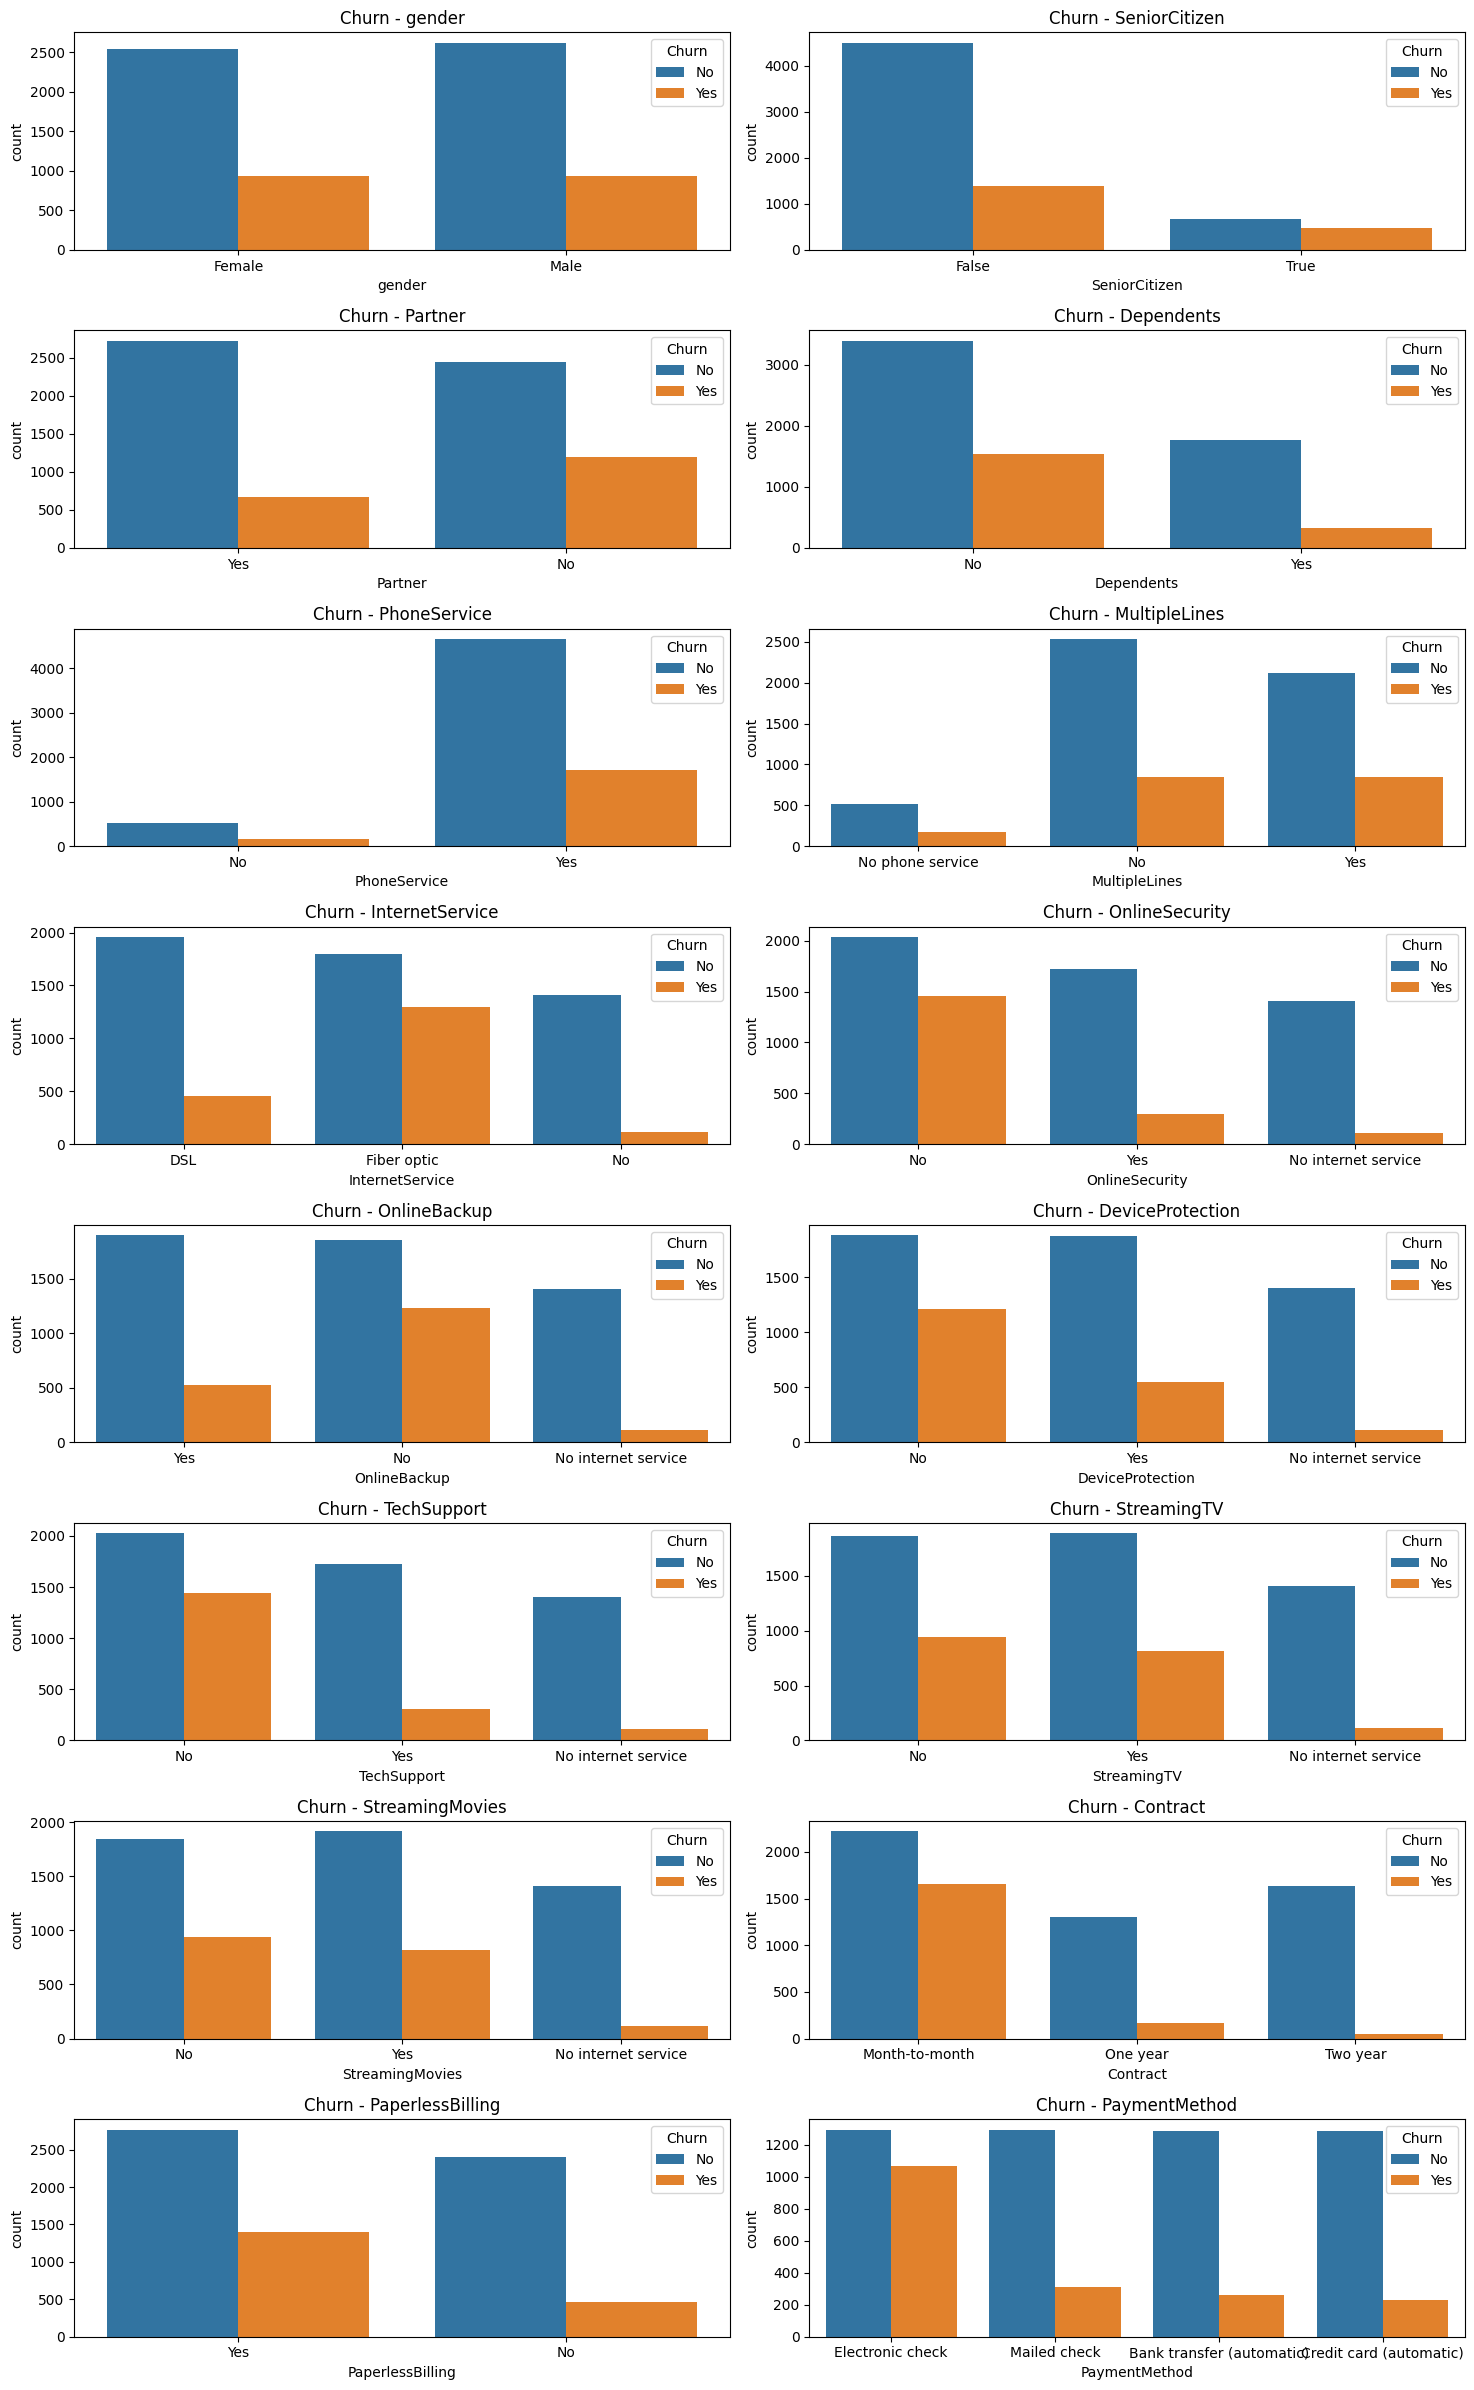

In [380]:
num_categorical = len(categorical_features)
rows = (num_categorical + 1) // 2  
cols = 2  

plt.figure(figsize=(15, 3 * rows))  

for i, col in enumerate(categorical_features):
    plt.subplot(rows, cols, i + 1)  
    sns.countplot(x=col, hue=target_feature, data=df)
    plt.title(f"{target_feature} - {col}")
    

plt.tight_layout()  
plt.show()

**Key Predictors:**

* **Contract Type:** Month-to-month contracts strongly correlate with higher churn.
* **Internet Service:** Fiber optic internet users show higher churn.
* **Payment Method:** Electronic check users have higher churn.
* **Additional Services:** Lack of online security, backup, device protection, and tech support increases churn.

**Demographic Influences:**

* **Senior Citizens:** Higher churn rate.
* **Partners/Dependents:** Customers without partners/dependents churn more.

**Other Factors:**

* **Paperless Billing:** Higher churn rate.
* **Streaming Services:** Users of streaming TV/movies have higher churn.

**Less Influential:**

* **Gender:** Minimal impact on churn.
* **Phone Service:** Small impact on churn.

**Overall Interpretations:**

* Contract flexibility, service quality/pricing, and the value of additional services are critical for retention.
* Specific customer profiles require targeted strategies.
* Payment/billing processes impact churn.

##### Numerical Analysis

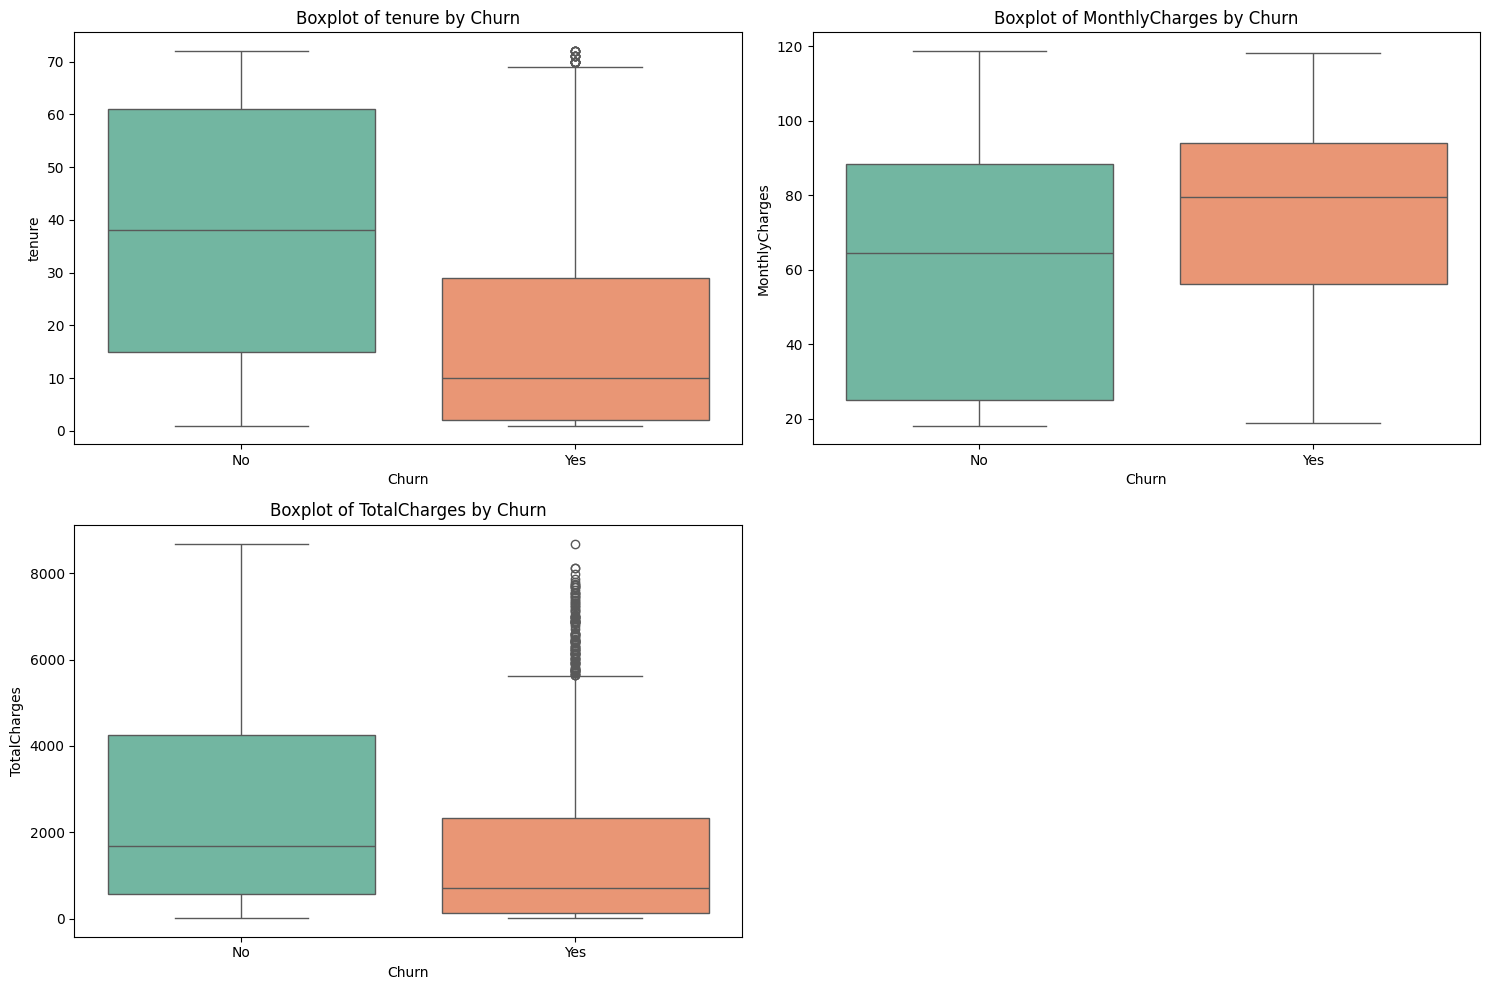

In [381]:
num_numerical = len(numerical_features)
rows = (num_numerical + 1) // 2
cols = 2

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numerical_features):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=target_feature, y=col, data=df, palette='Set2', hue=target_feature) 
    plt.title(f'Boxplot of {col} by {target_feature}')

plt.tight_layout()
plt.show()

**Tenure vs. Churn:**

* **Inverse Relationship:** Customers with shorter tenures are significantly more likely to churn.
* **Long Tenure Retention:** Customers with longer tenures tend to stay with the company.

**Monthly Charges vs. Churn:**

* **Positive Correlation:** Customers with higher monthly charges have a higher churn rate.
* **Price Sensitivity:** Suggests potential price sensitivity among customers.

**Total Charges vs. Churn:**

* **Reflects Tenure:** Total charges are lower for churned customers, consistent with shorter tenures.
* **High Total Charges & Retention:** Customers with high total charges are more likely to stay.
* **Outliers:** Presence of outliers in churned customer's total charges might require further investigation.

**Overall Interpretations:**

* Tenure is a strong indicator of customer loyalty.
* Higher monthly costs increase the risk of customer churn.
* Total charges are directly related to tenure, and inversely related to churn.

##### Correlation

In [382]:
#df_encoded = pd.get_dummies(data=df, columns=categorical_features, drop_first=True)
#df_encoded

In [383]:
#df_encoded['Churn'] = df_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
#df_encoded.head()

In [384]:
#corr_matrix = df_encoded.corr()
#churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
#
#plt.figure(figsize=(10, 10))  
#sns.barplot(x=churn_corr.values, y=churn_corr.index)
#plt.title('Correlation with Churn')
#plt.xlabel('Correlation Coefficient')
#plt.ylabel('Features')
#plt.show()

### Feature Engineering

Aiming for interpret-ability of the model, reducing the number of features (potentially) and creating new ones or simplifying the existing might prove helpful